[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker             AAP         AAP         AAP         AAP      AAP
Date                                                               
2020-01-02  143.805099  145.194340  142.109131  144.761332   944900
2020-01-03  143.814072  144.003520  141.856499  142.560142   567000
2020-01-06  141.450592  143.335995  141.116803  142.298576   880200
2020-01-07  139.772659  141.991838  137.490326  141.540784  1129500
2020-01-08  138.166916  140.774008  138.148870  139.691481   825700
Epoch 1/10



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1764
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0019
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0018
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


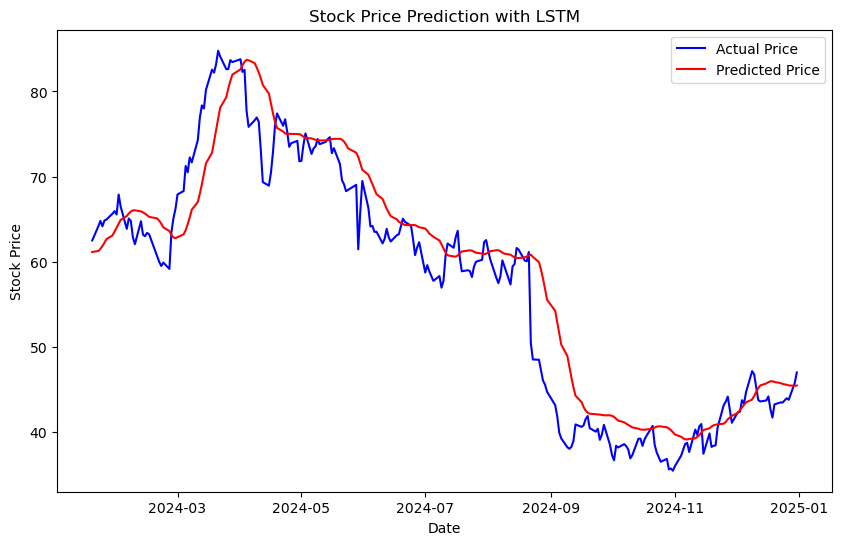

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler # scale the stock prices between o and 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense # Long Short Term Memory (LSTM)

# Load data
data = yf.download("AAP", start = "2020-01-01", end = "2025-01-01")
print(data.head())

# Preprocess data
close_prices = data["Close"].values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

# Create dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize results
plt.figure(figsize=(10,6))
plt.plot(data.index[train_size + 60:], close_prices[train_size + 60:], color="blue", label="Actual Price")
plt.plot(data.index[train_size + 60:], predictions, color="red", label="Predicted Price")
plt.title("Stock Price Prediction with LSTM")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
